# Combining into a single data frame

In [2]:
import pandas as pd
#import glob #to find pathnames

csv_path = "D:\DreamElevenScouting\Datasets\player-stats.csv"

#These features repeats in every CSV
redundant = ['Rk','Player','Nation','Pos','Squad','Comp','Age','Born','90s','Matches']

#reading the csv and removing reduntant features to improve the model accuracy
#path =r'D:\DreamElevenScouting\Datasets\player-stats.csv'
general = pd.read_csv(csv_path, header=1).drop(['Rk','Matches'], axis=1)
shooting = pd.read_csv(csv_path, header=1).drop(redundant,axis=1)
passing = pd.read_csv(csv_path,header=1).drop(redundant,axis=1)
passing_types = pd.read_csv(csv_path, header=1).drop(redundant,axis=1)
gca = pd.read_csv(csv_path, header=1).drop(redundant, axis=1)
defense = pd.read_csv(csv_path, header=1).drop(redundant,axis=1)
possesion = pd.read_csv(csv_path, header=1).drop(redundant,axis=1)
misc = pd.read_csv(csv_path, header=1).drop(redundant ,axis=1)

 

In [3]:
#appending table no before column names to avoid duplicates
def renameColumns(table_no, df):
    num = str(table_no) + "_"
    return df.rename(columns=lambda x:num+x)

shooting = renameColumns(2,shooting)
passing = renameColumns(3,passing)
passing_types = renameColumns(4, passing_types)
gca = renameColumns(5,gca)
defense=renameColumns(6,defense)
possesion=renameColumns(7,possesion)
misc=renameColumns(8,misc)

#combining the above dataframes into single df
grand =pd.concat([general,shooting,passing,passing_types,gca,defense,possesion,misc], axis=1)

In [4]:
grand.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,8_Ast.1,8_G+A.1,8_G-PK.1,8_G+A-PK,8_xG.1,8_xAG.1,8_xG+xAG,8_npxG.1,8_npxG+xAG.1,8_-9999
0,Ismael Aaneba,fr FRA,DF,Strasbourg,fr Ligue 1,21,1999,2,0,11,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,a7e4760c
1,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29,1990,22,20,1777,...,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f
2,Issah Abbas,gh GHA,DFFW,Mainz 05,de Bundesliga,21,1998,2,0,18,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2590ddf7
3,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32,1987,33,33,2889,...,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f
4,Sabit Abdulai,gh GHA,MF,Getafe,es La Liga,21,1999,3,0,60,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9f9e1b9c


# Filtering to select players with atleast 3 90s played and exclude goal keepers from the outfield dataset

In [5]:
# atleast 3 90s played
df = grand[grand['90s']>=3]

# excluding goalkeepers
df = df[df['Pos'] != 'GK'].reset_index()

# extracting player names
df['Player'] = df['Player'].str.split('\\', expand=True)[0]

# removing country short forms
df['Comp'] = df['Comp'].str.split(' ', expand=True, n=1)[1]

# Dealing with Null Values                  

In [6]:
df.isnull().sum()

index           0
Player          0
Nation          0
Pos             0
Squad           0
               ..
8_xAG.1         0
8_xG+xAG        0
8_npxG.1        0
8_npxG+xAG.1    0
8_-9999         0
Length: 241, dtype: int64

In [7]:
df = df.fillna(0)

# Replacing Duplicate name 

In [8]:
#checking for duplicated player names
df['Player'].duplicated().sum()

35

In [9]:
df[df['Player']=='Lionel Messi']

,index,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,8_Ast.1,8_G+A.1,8_G-PK.1,8_G+A-PK,8_xG.1,8_xAG.1,8_xG+xAG,8_npxG.1,8_npxG+xAG.1,8_-9999
1265,1720,Lionel Messi,ar ARG,FWMF,Barcelona,La Liga,33,1987,35,33,...,0.27,1.16,0.8,1.07,0.66,0.28,0.94,0.53,0.81,d70ce98e


In [10]:
df[df['Player']=='Aaron Ramsey']

,index,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,8_Ast.1,8_G+A.1,8_G-PK.1,8_G+A-PK,8_xG.1,8_xAG.1,8_xG+xAG,8_npxG.1,8_npxG+xAG.1,8_-9999
1574,2167,Aaron Ramsey,wls WAL,MF,Juventus,Serie A,29,1990,22,13,...,0.33,0.5,0.17,0.5,0.35,0.27,0.62,0.35,0.62,ef619b0b


In [11]:
pd.set_option('display.max_columns', None)

# view DataFrame
print(df)

      index               Player  Nation   Pos           Squad   
0         1  Patrick van Aanholt  nl NED    DF  Crystal Palace  \
1         3     Yunis Abdelhamid  ma MAR    DF           Reims   
2         5          Mehdi Abeid  dz ALG    MF          Nantes   
3         6      Laurent Abergel  fr FRA    MF         Lorient   
4         7          Charles Abi  fr FRA  FWMF   Saint-Étienne   
...     ...                  ...     ...   ...             ...   
2035   2816        Igor Zubeldia  es ESP    DF   Real Sociedad   
2036   2817         Steven Zuber  ch SUI  DFMF  Eint Frankfurt   
2037   2818     Martín Zubimendi  es ESP    MF   Real Sociedad   
2038   2819      Martin Ødegaard  no NOR    MF         Arsenal   
2039   2821        Filip Đuričić  rs SRB  MFFW        Sassuolo   

                Comp  Age  Born  MP  Starts   Min   90s  Gls  Ast  G+A  G-PK   
0     Premier League   29  1990  22      20  1777  19.7    0    1    1     0  \
1            Ligue 1   32  1987  33      33  28

# To have unique name (name+club)

In [12]:
import numpy as np #imported to work with arrays


players = []
for idx in range(len(df)):
    players.append(df['Player'][idx] + '({})'.format(df['Squad'][idx]))

player_ID = dict(zip(players, np.arange(len(players))))
player_ID

{'Patrick van Aanholt(Crystal Palace)': 0,
 'Yunis Abdelhamid(Reims)': 1,
 'Mehdi Abeid(Nantes)': 2,
 'Laurent Abergel(Lorient)': 3,
 'Charles Abi(Saint-Étienne)': 4,
 'Pape Abou Cissé(Saint-Étienne)': 5,
 'David Abraham(Eint Frankfurt)': 6,
 'Tammy Abraham(Chelsea)': 7,
 'Gennaro Acampora(Spezia)': 8,
 'Francesco Acerbi(Lazio)': 9,
 'Marcos Acuña(Sevilla)': 10,
 'Che Adams(Southampton)': 11,
 'Tyler Adams(RB Leipzig)': 12,
 'Sargis Adamyan(Hoffenheim)': 13,
 'Tosin Adarabioyo(Fulham)': 14,
 'Yacine Adli(Bordeaux)': 15,
 'Martin Agirregabiria(Alavés)': 16,
 'Lucien Agoume(Spezia)': 17,
 'Felix Agu(Werder Bremen)': 18,
 'Kevin Agudelo(Spezia)': 19,
 'Nayef Aguerd(Rennes)': 20,
 'Sergio Agüero(Manchester City)': 21,
 'Ruben Aguilar(Monaco)': 22,
 'Matteo Ahlinvi(Nîmes)': 23,
 'Jean-Eudes Aholou(Strasbourg)': 24,
 'Joseph Aidoo(Celta Vigo)': 25,
 'Ola Aina(Fulham)': 26,
 'Rayan Aït Nouri(Wolves)': 27,
 'Semi Ajayi(West Brom)': 28,
 'Ludovic Ajorque(Strasbourg)': 29,
 'Manuel Akanji(Dortmu

# Adding a new feature: Preferred foot

In [13]:


foot = []

if '4_Left' in df.columns and '4_Right' in df.columns:
    for i in range(len(df)):
        # ratio of left to right foot passes
        if df['4_Right'][i] != 0:
            val = df['4_Left'][i]/(df['4_Right'][i])
            if val>1:
                foot.append('left')
            else:
                foot.append('right')
        else:
            foot.append('none')

    # adding to the data frame        
    df['Foot'] = foot
else:
    print("One or both of the required columns are missing in the DataFrame.")


One or both of the required columns are missing in the DataFrame.


In [14]:
df

,index,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,-9999,2_MP,2_Starts,2_Min,2_Gls,2_Ast,2_G+A,2_G-PK,2_PK,2_PKatt,2_CrdY,2_CrdR,2_xG,2_npxG,2_xAG,2_npxG+xAG,2_PrgC,2_PrgP,2_PrgR,2_Gls.1,2_Ast.1,2_G+A.1,2_G-PK.1,2_G+A-PK,2_xG.1,2_xAG.1,2_xG+xAG,2_npxG.1,2_npxG+xAG.1,2_-9999,3_MP,3_Starts,3_Min,3_Gls,3_Ast,3_G+A,3_G-PK,3_PK,3_PKatt,3_CrdY,3_CrdR,3_xG,3_npxG,3_xAG,3_npxG+xAG,3_PrgC,3_PrgP,3_PrgR,3_Gls.1,3_Ast.1,3_G+A.1,3_G-PK.1,3_G+A-PK,3_xG.1,3_xAG.1,3_xG+xAG,3_npxG.1,3_npxG+xAG.1,3_-9999,4_MP,4_Starts,4_Min,4_Gls,4_Ast,4_G+A,4_G-PK,4_PK,4_PKatt,4_CrdY,4_CrdR,4_xG,4_npxG,4_xAG,4_npxG+xAG,4_PrgC,4_PrgP,4_PrgR,4_Gls.1,4_Ast.1,4_G+A.1,4_G-PK.1,4_G+A-PK,4_xG.1,4_xAG.1,4_xG+xAG,4_npxG.1,4_npxG+xAG.1,4_-9999,5_MP,5_Starts,5_Min,5_Gls,5_Ast,5_G+A,5_G-PK,5_PK,5_PKatt,5_CrdY,5_CrdR,5_xG,5_npxG,5_xAG,5_npxG+xAG,5_PrgC,5_PrgP,5_PrgR,5_Gls.1,5_Ast.1,5_G+A.1,5_G-PK.1,5_G+A-PK,5_xG.1,5_xAG.1,5_xG+xAG,5_npxG.1,5_npxG+xAG.1,5_-9999,6_MP,6_Starts,6_Min,6_Gls,6_Ast,6_G+A,6_G-PK,6_PK,6_PKatt,6_CrdY,6_CrdR,6_xG,6_npxG,6_xAG,6_npxG+xAG,6_PrgC,6_PrgP,6_PrgR,6_Gls.1,6_Ast.1,6_G+A.1,6_G-PK.1,6_G+A-PK,6_xG.1,6_xAG.1,6_xG+xAG,6_npxG.1,6_npxG+xAG.1,6_-9999,7_MP,7_Starts,7_Min,7_Gls,7_Ast,7_G+A,7_G-PK,7_PK,7_PKatt,7_CrdY,7_CrdR,7_xG,7_npxG,7_xAG,7_npxG+xAG,7_PrgC,7_PrgP,7_PrgR,7_Gls.1,7_Ast.1,7_G+A.1,7_G-PK.1,7_G+A-PK,7_xG.1,7_xAG.1,7_xG+xAG,7_npxG.1,7_npxG+xAG.1,7_-9999,8_MP,8_Starts,8_Min,8_Gls,8_Ast,8_G+A,8_G-PK,8_PK,8_PKatt,8_CrdY,8_CrdR,8_xG,8_npxG,8_xAG,8_npxG+xAG,8_PrgC,8_PrgP,8_PrgR,8_Gls.1,8_Ast.1,8_G+A.1,8_G-PK.1,8_G+A-PK,8_xG.1,8_xAG.1,8_xG+xAG,8_npxG.1,8_npxG+xAG.1,8_-9999
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,Premier League,29,1990,22,20,1777,19.7,0,1,1,0,0,0,2,0,1.4,1.4,0.7,2.1,38.0,103.0,87.0,0.00,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f,22,20,1777,0,1,1,0,0,0,2,0,1.4,1.4,0.7,2.1,38.0,103.0,87.0,0.00,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f,22,20,1777,0,1,1,0,0,0,2,0,1.4,1.4,0.7,2.1,38.0,103.0,87.0,0.00,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f,22,20,1777,0,1,1,0,0,0,2,0,1.4,1.4,0.7,2.1,38.0,103.0,87.0,0.00,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f,22,20,1777,0,1,1,0,0,0,2,0,1.4,1.4,0.7,2.1,38.0,103.0,87.0,0.00,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f,22,20,1777,0,1,1,0,0,0,2,0,1.4,1.4,0.7,2.1,38.0,103.0,87.0,0.00,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f,22,20,1777,0,1,1,0,0,0,2,0,1.4,1.4,0.7,2.1,38.0,103.0,87.0,0.00,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f,22,20,1777,0,1,1,0,0,0,2,0,1.4,1.4,0.7,2.1,38.0,103.0,87.0,0.00,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f
1,3,Yunis Abdelhamid,ma MAR,DF,Reims,Ligue 1,32,1987,33,33,2889,32.1,3,0,3,3,0,0,4,1,1.9,1.9,0.3,2.2,18.0,99.0,3.0,0.09,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f,33,33,2889,3,0,3,3,0,0,4,1,1.9,1.9,0.3,2.2,18.0,99.0,3.0,0.09,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f,33,33,2889,3,0,3,3,0,0,4,1,1.9,1.9,0.3,2.2,18.0,99.0,3.0,0.09,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f,33,33,2889,3,0,3,3,0,0,4,1,1.9,1.9,0.3,2.2,18.0,99.0,3.0,0.09,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f,33,33,2889,3,0,3,3,0,0,4,1,1.9,1.9,0.3,2.2,18.0,99.0,3.0,0.09,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f,33,33,2889,3,0,3,3,0,0,4,1,1.9,1.9,0.3,2.2,18.0,99.0,3.0,0.09,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f,33,33,2889,3,0,3,3,0,0,4,1,1.9,1.9,0.3,2.2,18.0,99.0,3.0,0.09,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f,33,33,2889,3,0,3,3,0,0,4,1,1.9,1.9,0.3,2.2,18.0,99.0,3.0,0.09,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f
2,5,Mehdi Abeid,dz ALG,MF,Nantes,Ligue 1,27,1992,18,15,1320,14.7,0,0,0,0,0,0,5,0,1.0,1.0,0.8,1.8,32.0,65.0,16.0,0.00,0.00,0.00,0.00,0.00,0.07,0.05,0.12,0.07,0.12,a4c3f7af,18,15,1320,0,0,0,0,0,0,5,0,1.0,1.0,0.8,1.8,32.0,65.0,16.0,0.00,0.00,0.00,0.00,0.00,0.07

Text(0.5, 1.0, 'Position distribution among Leagues')

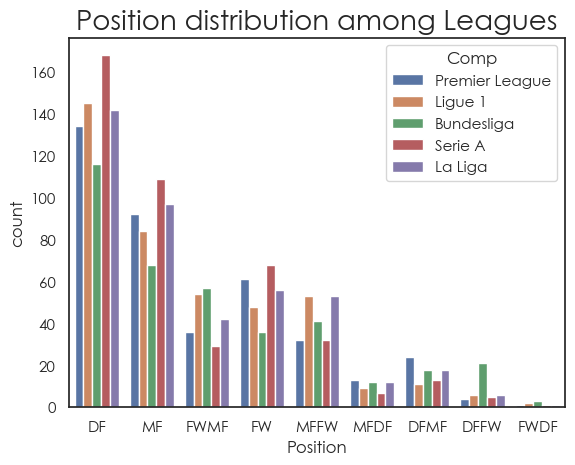

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


sns.set_theme(style="white", font="Century Gothic")

ax = sns.countplot(x="Pos" , hue='Comp' , data=df)
plt.xlabel('Position')
plt.title('Position distribution among Leagues', size=20)

# Age Analysis

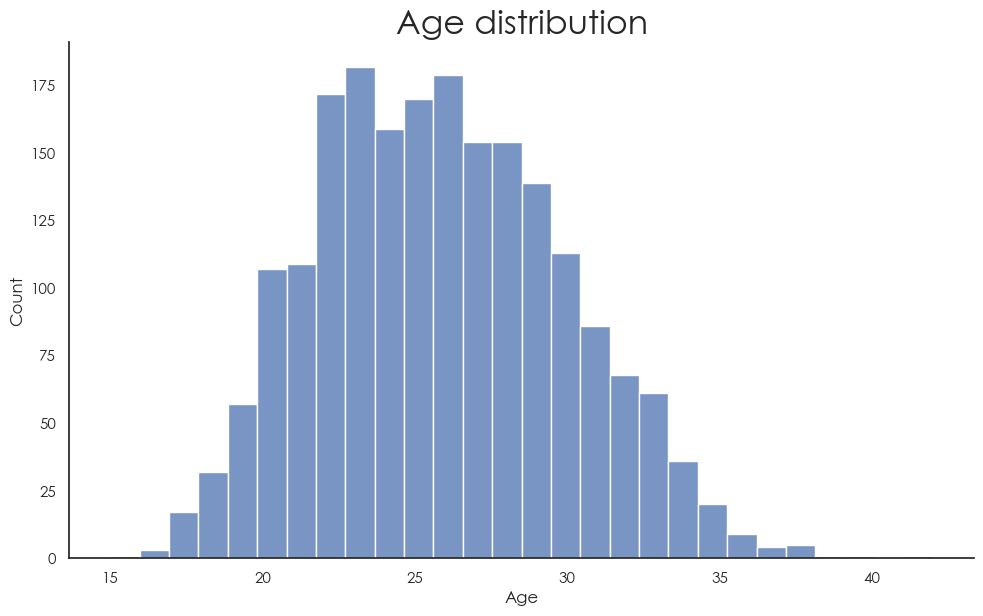

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


sns.FacetGrid(df, height=6, aspect=10/6) \
   .map(sns.histplot, "Age", bins=28)
plt.title("Age distribution", size=24)

plt.show()

In [17]:
df.head()

,index,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,-9999,2_MP,2_Starts,2_Min,2_Gls,2_Ast,2_G+A,2_G-PK,2_PK,2_PKatt,2_CrdY,2_CrdR,2_xG,2_npxG,2_xAG,2_npxG+xAG,2_PrgC,2_PrgP,2_PrgR,2_Gls.1,2_Ast.1,2_G+A.1,2_G-PK.1,2_G+A-PK,2_xG.1,2_xAG.1,2_xG+xAG,2_npxG.1,2_npxG+xAG.1,2_-9999,3_MP,3_Starts,3_Min,3_Gls,3_Ast,3_G+A,3_G-PK,3_PK,3_PKatt,3_CrdY,3_CrdR,3_xG,3_npxG,3_xAG,3_npxG+xAG,3_PrgC,3_PrgP,3_PrgR,3_Gls.1,3_Ast.1,3_G+A.1,3_G-PK.1,3_G+A-PK,3_xG.1,3_xAG.1,3_xG+xAG,3_npxG.1,3_npxG+xAG.1,3_-9999,4_MP,4_Starts,4_Min,4_Gls,4_Ast,4_G+A,4_G-PK,4_PK,4_PKatt,4_CrdY,4_CrdR,4_xG,4_npxG,4_xAG,4_npxG+xAG,4_PrgC,4_PrgP,4_PrgR,4_Gls.1,4_Ast.1,4_G+A.1,4_G-PK.1,4_G+A-PK,4_xG.1,4_xAG.1,4_xG+xAG,4_npxG.1,4_npxG+xAG.1,4_-9999,5_MP,5_Starts,5_Min,5_Gls,5_Ast,5_G+A,5_G-PK,5_PK,5_PKatt,5_CrdY,5_CrdR,5_xG,5_npxG,5_xAG,5_npxG+xAG,5_PrgC,5_PrgP,5_PrgR,5_Gls.1,5_Ast.1,5_G+A.1,5_G-PK.1,5_G+A-PK,5_xG.1,5_xAG.1,5_xG+xAG,5_npxG.1,5_npxG+xAG.1,5_-9999,6_MP,6_Starts,6_Min,6_Gls,6_Ast,6_G+A,6_G-PK,6_PK,6_PKatt,6_CrdY,6_CrdR,6_xG,6_npxG,6_xAG,6_npxG+xAG,6_PrgC,6_PrgP,6_PrgR,6_Gls.1,6_Ast.1,6_G+A.1,6_G-PK.1,6_G+A-PK,6_xG.1,6_xAG.1,6_xG+xAG,6_npxG.1,6_npxG+xAG.1,6_-9999,7_MP,7_Starts,7_Min,7_Gls,7_Ast,7_G+A,7_G-PK,7_PK,7_PKatt,7_CrdY,7_CrdR,7_xG,7_npxG,7_xAG,7_npxG+xAG,7_PrgC,7_PrgP,7_PrgR,7_Gls.1,7_Ast.1,7_G+A.1,7_G-PK.1,7_G+A-PK,7_xG.1,7_xAG.1,7_xG+xAG,7_npxG.1,7_npxG+xAG.1,7_-9999,8_MP,8_Starts,8_Min,8_Gls,8_Ast,8_G+A,8_G-PK,8_PK,8_PKatt,8_CrdY,8_CrdR,8_xG,8_npxG,8_xAG,8_npxG+xAG,8_PrgC,8_PrgP,8_PrgR,8_Gls.1,8_Ast.1,8_G+A.1,8_G-PK.1,8_G+A-PK,8_xG.1,8_xAG.1,8_xG+xAG,8_npxG.1,8_npxG+xAG.1,8_-9999
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,Premier League,29,1990,22,20,1777,19.7,0,1,1,0,0,0,2,0,1.4,1.4,0.7,2.1,38.0,103.0,87.0,0.00,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f,22,20,1777,0,1,1,0,0,0,2,0,1.4,1.4,0.7,2.1,38.0,103.0,87.0,0.00,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f,22,20,1777,0,1,1,0,0,0,2,0,1.4,1.4,0.7,2.1,38.0,103.0,87.0,0.00,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f,22,20,1777,0,1,1,0,0,0,2,0,1.4,1.4,0.7,2.1,38.0,103.0,87.0,0.00,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f,22,20,1777,0,1,1,0,0,0,2,0,1.4,1.4,0.7,2.1,38.0,103.0,87.0,0.00,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f,22,20,1777,0,1,1,0,0,0,2,0,1.4,1.4,0.7,2.1,38.0,103.0,87.0,0.00,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f,22,20,1777,0,1,1,0,0,0,2,0,1.4,1.4,0.7,2.1,38.0,103.0,87.0,0.00,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f,22,20,1777,0,1,1,0,0,0,2,0,1.4,1.4,0.7,2.1,38.0,103.0,87.0,0.00,0.05,0.05,0.00,0.05,0.07,0.04,0.11,0.07,0.11,5f09991f
1,3,Yunis Abdelhamid,ma MAR,DF,Reims,Ligue 1,32,1987,33,33,2889,32.1,3,0,3,3,0,0,4,1,1.9,1.9,0.3,2.2,18.0,99.0,3.0,0.09,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f,33,33,2889,3,0,3,3,0,0,4,1,1.9,1.9,0.3,2.2,18.0,99.0,3.0,0.09,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f,33,33,2889,3,0,3,3,0,0,4,1,1.9,1.9,0.3,2.2,18.0,99.0,3.0,0.09,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f,33,33,2889,3,0,3,3,0,0,4,1,1.9,1.9,0.3,2.2,18.0,99.0,3.0,0.09,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f,33,33,2889,3,0,3,3,0,0,4,1,1.9,1.9,0.3,2.2,18.0,99.0,3.0,0.09,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f,33,33,2889,3,0,3,3,0,0,4,1,1.9,1.9,0.3,2.2,18.0,99.0,3.0,0.09,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f,33,33,2889,3,0,3,3,0,0,4,1,1.9,1.9,0.3,2.2,18.0,99.0,3.0,0.09,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f,33,33,2889,3,0,3,3,0,0,4,1,1.9,1.9,0.3,2.2,18.0,99.0,3.0,0.09,0.00,0.09,0.09,0.09,0.06,0.01,0.07,0.06,0.07,32c2d95f
2,5,Mehdi Abeid,dz ALG,MF,Nantes,Ligue 1,27,1992,18,15,1320,14.7,0,0,0,0,0,0,5,0,1.0,1.0,0.8,1.8,32.0,65.0,16.0,0.00,0.00,0.00,0.00,0.00,0.07,0.05,0.12,0.07,0.12,a4c3f7af,18,15,1320,0,0,0,0,0,0,5,0,1.0,1.0,0.8,1.8,32.0,65.0,16.0,0.00,0.00,0.00,0.00,0.00,0.07

Text(0.5, 1.0, 'Age variance in Leagues')

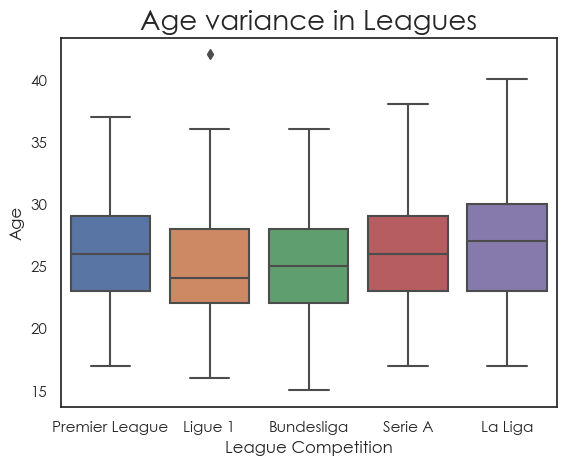

In [18]:


ax = sns.boxplot(x='Comp' , y='Age' , data=df)
plt.xlabel('League Competition')
plt.title('Age variance in Leagues', size=20)

# From observing the above chart we can come to a point that Ligue 1(France) having most of the young crops in top 5 leagues,

# t-distributed Stochastic Neighbor Embedding (t-SNE)

Text(0.5, 1.0, 't-SNE - Outfield players')

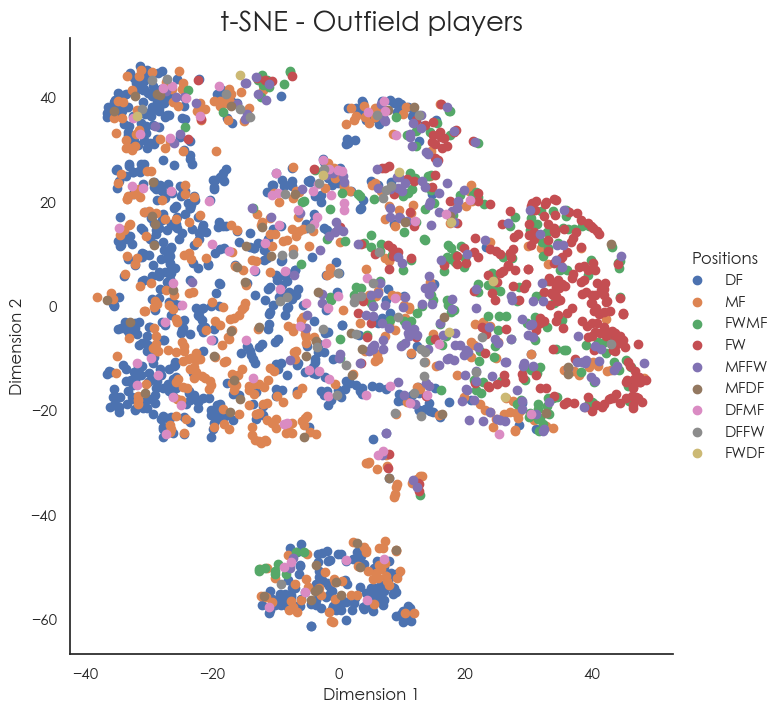

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# selecting only numerical metrics
stats = df.select_dtypes(include=np.number)
# position types
labels = df['Pos']

# standardizing the data
data = StandardScaler().fit_transform(stats)

# configuring tSNE params
model = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_data = model.fit_transform(data)

# creating a new df to plot the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension 1", "Dimension 2", "Positions"))

# ploting the result of tSNE
ax = sns.FacetGrid(tsne_df, hue="Positions", height=7)\
        .map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend()
plt.title('t-SNE - Outfield players', size=20)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# selecting only numerical metrics
stats = df.iloc[:, 12:-1]

# selecting only numerical metrics
stats = df.iloc[:, 12:-1]
# position types
labels = df['Pos']

# replace string value with NaN
stats = stats.replace('5f09991f', np.nan)

# drop rows with NaN values
stats = stats.dropna()

# position types
labels = df['Pos']

# standardizing the data
data = StandardScaler().fit_transform(stats)

# configuring tSNE params
model = TSNE(n_components=2, perplexity=30, random_state=0)
tsne_data = model.fit_transform(data)

# creating a new df to plot the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension 1", "Dimension 2", "Positions"))

# ploting the result of tSNE
ax = sns.FacetGrid(tsne_df, hue="Positions", size=7)\
        .map(plt.scatter, 'Dimension 1', 'Dimension 2').add_legend()
plt.title('t-SNE - Outfield players', size=20)

ValueError: could not convert string to float: '32c2d95f'

# Dimensionality reduction using PCA

Text(0.5, 1.0, 'PCA: components selection')

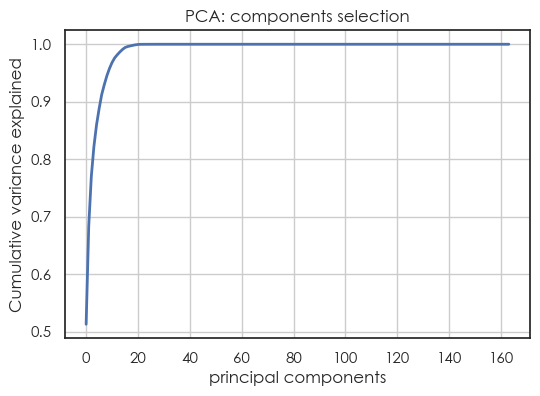

In [ ]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

# standardizing the data
data = StandardScaler().fit_transform(stats)

# setting up and running PCA
pca = decomposition.PCA()
pca.n_components = 164
pca_data = pca.fit_transform(data)

# % variance explained per components
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

# cumulative variance explained
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(6, 4))
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('principal components')
plt.ylabel('Cumulative variance explained')
plt.title('PCA: components selection')

In [ ]:
stats=pca_data[:,:90]

In [31]:
from scipy.spatial import distance
import numpy as np
from tqdm import tqdm
import pickle

players = []

# fetch the player vector
def getStats(name):
    idx = player_ID[name]
    return stats[idx, :]

# fetch cosine similarity between two player vectors
def similarity(player1, player2):
    return 1 - distance.cosine(getStats(player1), getStats(player2))

# normalize an array to a scale of 0 to 100
def normalize(array):
    return np.array([round(num, 2) for num in (array - min(array))*100/(max(array)-min(array))])

# player-similarities hash table
engine = {}
for query in tqdm(players):
    metric = []
    for player in players:
        value = similarity(query, player)
        metric.append(value)
    metric = normalize(metric)
    # adding normalized similarity values to the 'player name' key
    engine[query] = metric

# saving hash table/dict as a pickle
with open(r'engine.pickle', 'wb') as file:
    pickle.dump(engine, file)

0it [00:00, ?it/s]
